# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings

In [141]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [142]:
import pandas as pd

path = '/content/drive/MyDrive/DM/DM2023-Lab2-Master/'
### training data
anger_train = pd.read_csv(path+"data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(path+"data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(path+"data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(path+"data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [143]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [144]:
### testing data
anger_test = pd.read_csv(path+"data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(path+"data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(path+"data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(path+"data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [145]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [146]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [147]:
train_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,id,text,emotion,intensity
2319,30315,It's Thursday which means it's Grey's day #TGI...,joy,0.560
1781,20924,#Trends thread;'P)..it was in my #drafts&amp;n...,fear,0.312
389,10389,"@BosNaud so scared to ruffle feathers, he reso...",anger,0.500
1085,20228,We ashamed of being an ally to you. Pakistan s...,fear,0.667
681,10681,"@RichardHBell Yes, I think he held a grudge ...",anger,0.375


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [148]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Do preprocessing by converts all tokens to lowercase, remove stopwords, filters out non-alphabetic words, reduce to their base form.
2. Use CountVectorizer to convert cleaned text to matrix of word counts. Calculates frequency of each word. Sort them in descending order and select top 30 words.
3. Generated bar plots.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



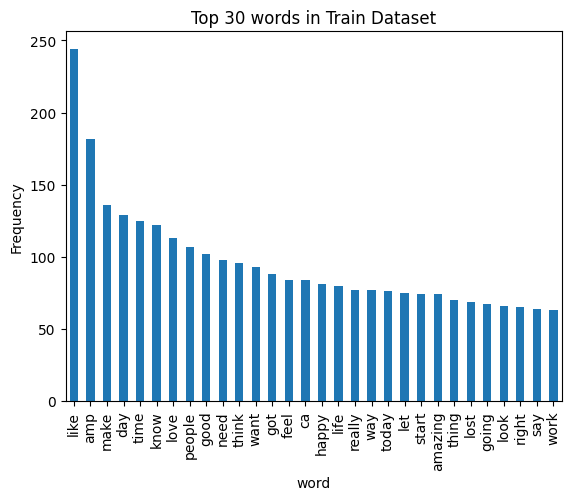

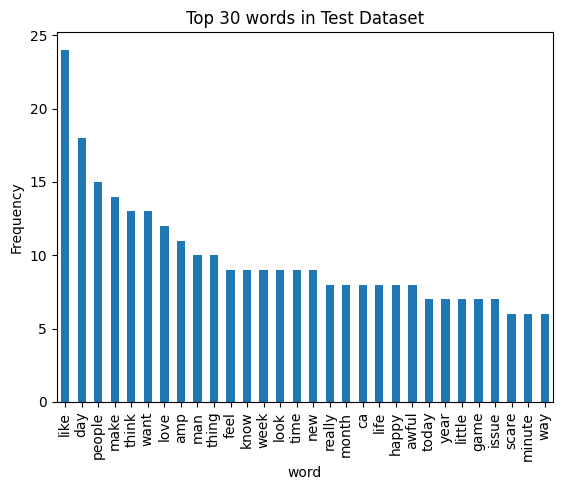

In [149]:
def clean_words(new_tokens):
    #to lower case
    new_tokens = [t.lower() for t in new_tokens]
    #remove stopwords
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    #remove non alphabet letter
    new_tokens = [t for t in new_tokens if t.isalpha()]
    # #reduce words to the base form EG rocks : rock.
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens


def plot_top_words(dataframe, title):
    vectorizer = CountVectorizer(stop_words='english')
    data_matrix = vectorizer.fit_transform(dataframe)
    sum_words = data_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = words_freq[:30]

    df = pd.DataFrame(top_words, columns=['word', 'count'])
    df.plot.bar(x='word', y='count', legend=False, title=title)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)


clean_train = clean_words(word_tokenize(''.join(train_df['text'])))
clean_test = clean_words(word_tokenize(''.join(test_df['text'])))

plot_top_words(clean_train, 'Top 30 words in Train Dataset')
plot_top_words(clean_test, 'Top 30 words in Test Dataset')
plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [150]:
## save to pickle file
train_df.to_pickle(path+"data/train_df.pkl")
test_df.to_pickle(path+"data/test_df.pkl")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [151]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle(path+"data/train_df.pkl")
test_df = pd.read_pickle(path+"data/test_df.pkl")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [152]:
train_df['emotion'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

In [153]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



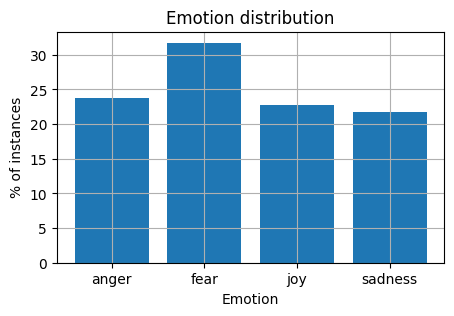

In [154]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text'] #how many rows of data in each emotion
df1 = df1.apply(lambda x: round(x*100/post_total,3)) #percentage of posts for each emotion

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [155]:
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [156]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [157]:
# 1. 'Learn' a vocabulary dictionary of all tokens in the raw documents.
# I like a dog :
# I -> 0
# like -> 1
# a -> 2
# dog -> 3
# 0,1,2,3 : index, fit learn the words in sentence and gave index
BOW_vectorizer.fit(train_df['text'])

# dtest_df can use the one learned on train_df, don't need to use vectorizer on test_df, if we use on test_df also, ther may be overfitting case happened.

# 2. Transform documents to document-term matrix.
# I like a dog => [1,1,1,1]
# transform each token in sentene into vector []
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

#train: I like a cat -> [1,1,1,1]
# test: I like a dog -> [1,1,1,0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [158]:
# check the result
train_data_BOW_features #3613 rows, 10115 columns(tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [159]:
type(train_data_BOW_features)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



scipy.sparse._csr.csr_matrix

In [160]:
# add .toarray() to show
# each row is a text
# each column is a token
train_data_BOW_features.toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [161]:
# check the dimension
train_data_BOW_features.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(3613, 10115)

In [162]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[10000:10050]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['xxx', 'ya', 'ya_boi_huck', 'yaassss', 'yachtrock', 'yahoocare',
       'yahweh', 'yall', 'yallamaccabi', 'yalls', 'yan', 'yang', 'yanks',
       'yard', 'yards', 'yasezayoni', 'yawnoff', 'yay', 'ydu', 'ye',
       'yea', 'yeah', 'year', 'yearly', 'yearning', 'years', 'yeg',
       'yell', 'yelled', 'yeller', 'yelling', 'yellow', 'yemen', 'yep',
       'yes', 'yesss', 'yesterday', 'yet', 'yeye', 'yf', 'yh', 'yield',
       'yikes', 'ynnsanity', 'yo', 'yoelamite', 'yoga', 'yooo', 'yoosung',
       'york'], dtype=object)

In [163]:
# print the vocab learned
print("Vocabulary: ", BOW_vectorizer.get_feature_names_out())

# Convert train data features to a dataframe to visualize
print("\nTrain data BOW features: ")
print(pd.DataFrame(train_data_BOW_features.toarray(),
      columns=BOW_vectorizer.get_feature_names_out()))

# Convert test data features to a dataframe to visualize
print("\nTest data BOW features: ")
print(pd.DataFrame(test_data_BOW_features.toarray(),
      columns=BOW_vectorizer.get_feature_names_out()))

#column : each column is word
#row : each row text


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Vocabulary:  ['00' '000' '00pm' ... 'य_ब' 'सत' 'アニメ']

Train data BOW features: 
      00  000  00pm  00tiffanyr  01  02  03  0303  034  04  ...  zoolander  \
0      0    0     0           0   0   0   0     0    0   0  ...          0   
1      0    0     0           0   0   0   0     0    0   0  ...          0   
2      0    0     0           0   0   0   0     0    0   0  ...          0   
3      0    0     0           0   0   0   0     0    0   0  ...          0   
4      0    0     0           0   0   0   0     0    0   0  ...          0   
...   ..  ...   ...         ...  ..  ..  ..   ...  ...  ..  ...        ...   
3608   0    0     0           0   0   0   0     0    0   0  ...          0   
3609   0    0     0           0   0   0   0     0    0   0  ...          0   
3610   0    0     0           0   0   0   0     0    0   0  ...          0   
3611   0    0     0           0   0   0   0     0    0   0  ...          0   
3612   0    0     0           0   0   0   0     0    0   0  .

In [164]:
#embedding:
#transfer each word in text to a vector

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [165]:
"😂" in feature_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



False

Let's try using another tokenizer below.

In [166]:
import nltk

# build analyzers (bag-of-words), extract top 500 words/features, NLTK's word_tokenize() is more comprehensive and linguistically aware
# use nltk tokenizer because the default cannot detect emoji as a token, but nltk can detect it
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [167]:
train_data_BOW_features_500.toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[0, 2, 0, ..., 0, 0, 0],
       [1, 7, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [168]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [169]:
# Convert train data features to a dataframe to visualize
print("\nTrain data BOW features: ")
print(pd.DataFrame(train_data_BOW_features_500.toarray(),
      columns=BOW_500.get_feature_names_out()))


Train data BOW features: 
      !  #  $  %  &  '  'd  'll  'm  're  ...  year  years  yet  you  your  \
0     0  2  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
1     1  7  0  0  1  2   0    0   0    0  ...     0      0    0    0     0   
2     0  1  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
3     0  1  0  0  0  0   0    0   0    0  ...     0      0    0    2     0   
4     0  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
...  .. .. .. .. .. ..  ..  ...  ..  ...  ...   ...    ...  ...  ...   ...   
3608  0  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
3609  1  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
3610  3  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
3611  0  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
3612  1  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   

      yourself  ’  “  ”  😂  
0      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [30]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [31]:
# Answer here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer_1000 = TfidfVectorizer(max_features=1000)

# Fit and transform the 'text' data
train_data_tfidf_features_1000 = tfidf_vectorizer_1000.fit_transform(train_df['text'])

print("\nTrain data tfidf features: ")
print(pd.DataFrame(train_data_tfidf_features_1000.toarray(),
      columns=tfidf_vectorizer_1000.get_feature_names_out()))

# Get the feature names 100 to 110
tfidf_feature_names_1000 = tfidf_vectorizer_1000.get_feature_names_out()
print("\nFeature names for features [100:110]: ")
print(tfidf_feature_names_1000[100:110])



Train data tfidf features: 
       10  100   12   15   17   20  2016   30   70  about  ...  years  yes  \
0     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...  ...  ...    ...  ...    ...  ...   
3608  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   
3609  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   
3610  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   
3611  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   
3612  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0  ...    0.0  0.0   

      yesterday  yet   yo       yo

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text']) #use BOW coz model will not know the string text, we need to transform them from text to vector using BOW
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [33]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'anger', 'fear', 'fear', 'fear', 'joy', 'fear',
       'anger', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [34]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [37]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [36]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [38]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

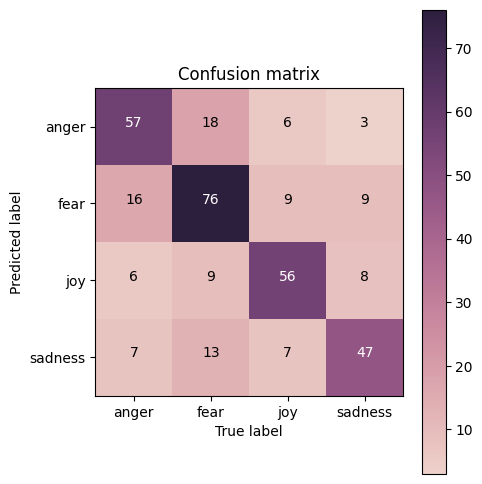

In [39]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
For the above confusion matrix:
- The rows correspond to the predicted classes.
- The columns correspond to the actual classes.

The elements on the diagonal of the confusion matrix represent the number of instances where the predicted class matches the actual class, also known as the true positives for each class:
- 57 instances where the class was 'anger' and the model correctly predicted anger.
- 76 instances where the class was 'fear and the model correctly predicted fear.
- 56 instances where the class was 'joy' and the model correctly predicted joy.
- 47 instances where the class was 'sadness' and the model correctly predicted sadness.

Below is the interpretation for each off-diagonal element, which represents the misclassifications:
First row:
  - 18 instances were actually fear but predicted as anger.
  - 6 instances were actually joy but predicted as anger.
  - 3 instances were actually sadness but predicted as anger.
Second row:
  - 16 instances were actually anger but predicted as fear.
  - 9 instances were actually joy but predicted as fear.
  - 9 instances were actually sadness but predicted as fear.
Third row:
  - 6 instances were actually anger but predicted as joy.
  - 9 instances were actually fear but predicted as joy.
  - 8 instances were actually sadness but predicted as joy.
Fourth row:
  - 7 instances were actually anger but predicted as sadness.
  - 13 instances were actually fear but predicted as sadness.
  - 7 instances were actually joy but predicted as sadness.

The diagonal values are key indicators of the model's ability to correctly classify each emotion. The higher the number on the diagonal for a given class, the better the model is at recognizing and predicting that class correctly.

The sum of the diagonal elements gives us the total number of correct predictions made by the model. The overall accuracy of the model can be calculated by summing these diagonal elements and dividing by the total number of instances in the dataset.

Each off-diagonal element in the matrix indicates a type of error. For example, the model seems to have more difficulty in correctly predicting anger and fear as it often confuses anger for fear and vice versa, as indicated by the 18 and 16 in the first column of the second row and the first row of the second column, respectively.

Similarly, sadness is more often confused with fear (13 instances) than with joy or anger. Misclassifications between joy and sadness are also notable but less frequent.

This matrix is useful to see not just how many predictions were wrong, but also which specific classes are being confused by the model, which can be crucial information when trying to improve the model's performance.




---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



training accuracy: 0.79
testing accuracy: 0.7
mbm model:                precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

Confusion Matrix of mnb naive bayes
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


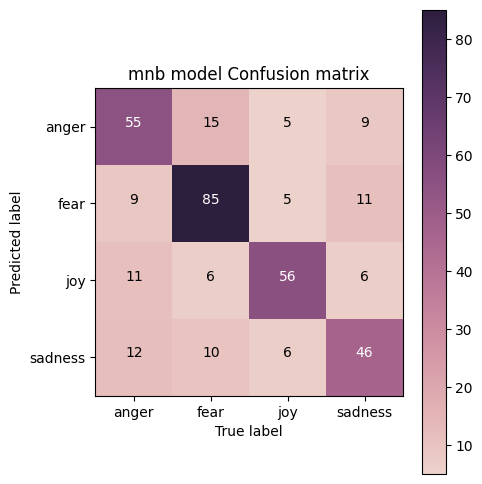

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

mnb_y_train_pred = mnb.predict(X_train)
mnb_y_test_pred = mnb.predict(X_test)

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true = y_train, y_pred = mnb_y_train_pred)
acc_test = accuracy_score(y_true = y_test, y_pred = mnb_y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print("mbm model: ",classification_report(y_true = y_test, y_pred = mnb_y_test_pred))

mnb_cm = confusion_matrix(y_true = y_test, y_pred = mnb_y_test_pred)
print('Confusion Matrix of mnb naive bayes')
print(mnb_cm)

plot_confusion_matrix(mnb_cm, classes=my_tags, title='mnb model Confusion matrix')


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

## Answer
### Comparing Decision Tree and Naive Bayes for Emotion Classification

Based on the results, Decision Tree model outperforms the Naive Bayes model in terms of training accuracy (0.99 vs. 0.79) but performs worse in testing accuracy (0.68 vs. 0.70). This suggests that the Decision Tree model overfits the training data and fails to generalize well to unseen data, while the Naive Bayes model, despite lower training accuracy, achieves a more stable performance on unseen data.

### Training Accuracy:
Decision Tree: Achieves a higher training accuracy, indicating it might have learned the patterns in the training data very well.
Naive Bayes: Lower training accuracy suggests it might not have captured all the subtle differences of the training data.

### Testing Accuracy:
Decision Tree: Significantly lower testing accuracy implies overfitting, where the model memorizes the training data but fails to generalize to unseen data.
Naive Bayes: Slightly lower but stable testing accuracy suggests better generalization to unseen data.

### Confusion Matrix:
Decision Tree: Shows higher misclassifications between similar emotions like anger-fear and joy-sadness, confirming overfitting and sensitivity to specific training data patterns.
Naive Bayes: Shows a more balanced distribution of misclassifications across all emotions, suggesting better overall generalization to unseen data.

### Decision Tree:
Learns a hierarchical tree structure by splitting the data based on features, potentially capturing complex relationships but prone to overfitting if the training data is not representative of the overall population.
### Naive Bayes:
Makes predictions based on independent features and their probabilities, potentially being less sensitive to specific training data patterns but might struggle with complex relationships between features.

### Decision Tree:
#### Pros:
High training accuracy, good for capturing specific data patterns.
Interpretable model, easy to understand the decision-making process.
#### Cons:
Prone to overfitting, sensitive to training data specifics.
Can be computationally expensive for large datasets.

### Naive Bayes:
#### Pros:
Less prone to overfitting, generalizes better to unseen data.
Computationally efficient for large datasets.
#### Cons:
Lower training accuracy, might not capture complex relationships.
Less transparent than decision-making process.

### Differences:
The Decision Tree's high training accuracy but low testing accuracy suggests it learned the training data too closely, becoming susceptible to overfitting.
The Naive Bayes model, despite lower training accuracy, shows a more balanced distribution of misclassifications across all emotions, indicating better generalization to unseen data.

To conclude, choosing the best model depends on our priorities. If high training accuracy and interpretability are crucial, the Decision Tree might be preferable, but it might have potential overfitting risks. Naive Bayes model might be a better choice for better generalization and performance on unseen data, even with slightly lower training accuracy.
We can consider applying additional techniques like regularization to reduce overfitting for the Decision Tree and exploring variations of the Naive Bayes model for potentially better performance.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re, string

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove special characters
    text = re.sub(r'[#*!]', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and short words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to each document
preprocessed_text = [preprocess_text(doc) for doc in train_df['text']]

# Build vectorizer (tfidf) with custom preprocessor
TFIDF500_vectorizer = TfidfVectorizer(max_features=500, preprocessor=preprocess_text)

# Apply vectorizer to preprocessed data
TFIDF500_vectorizer.fit(preprocessed_text)
train_data_TFIDF_features_500 = TFIDF500_vectorizer.transform(preprocessed_text)

# Check features
TFIDF500_vectorizer.get_feature_names_out()[100:110]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['done', 'dont', 'dreadful', 'dream', 'drop', 'dude', 'dull', 'eat',
       'either', 'elated'], dtype=object)

In [104]:
#PCA
from sklearn.decomposition import PCA
tfidf_PCA = PCA(n_components = 8).fit_transform(train_data_TFIDF_features_500.toarray())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



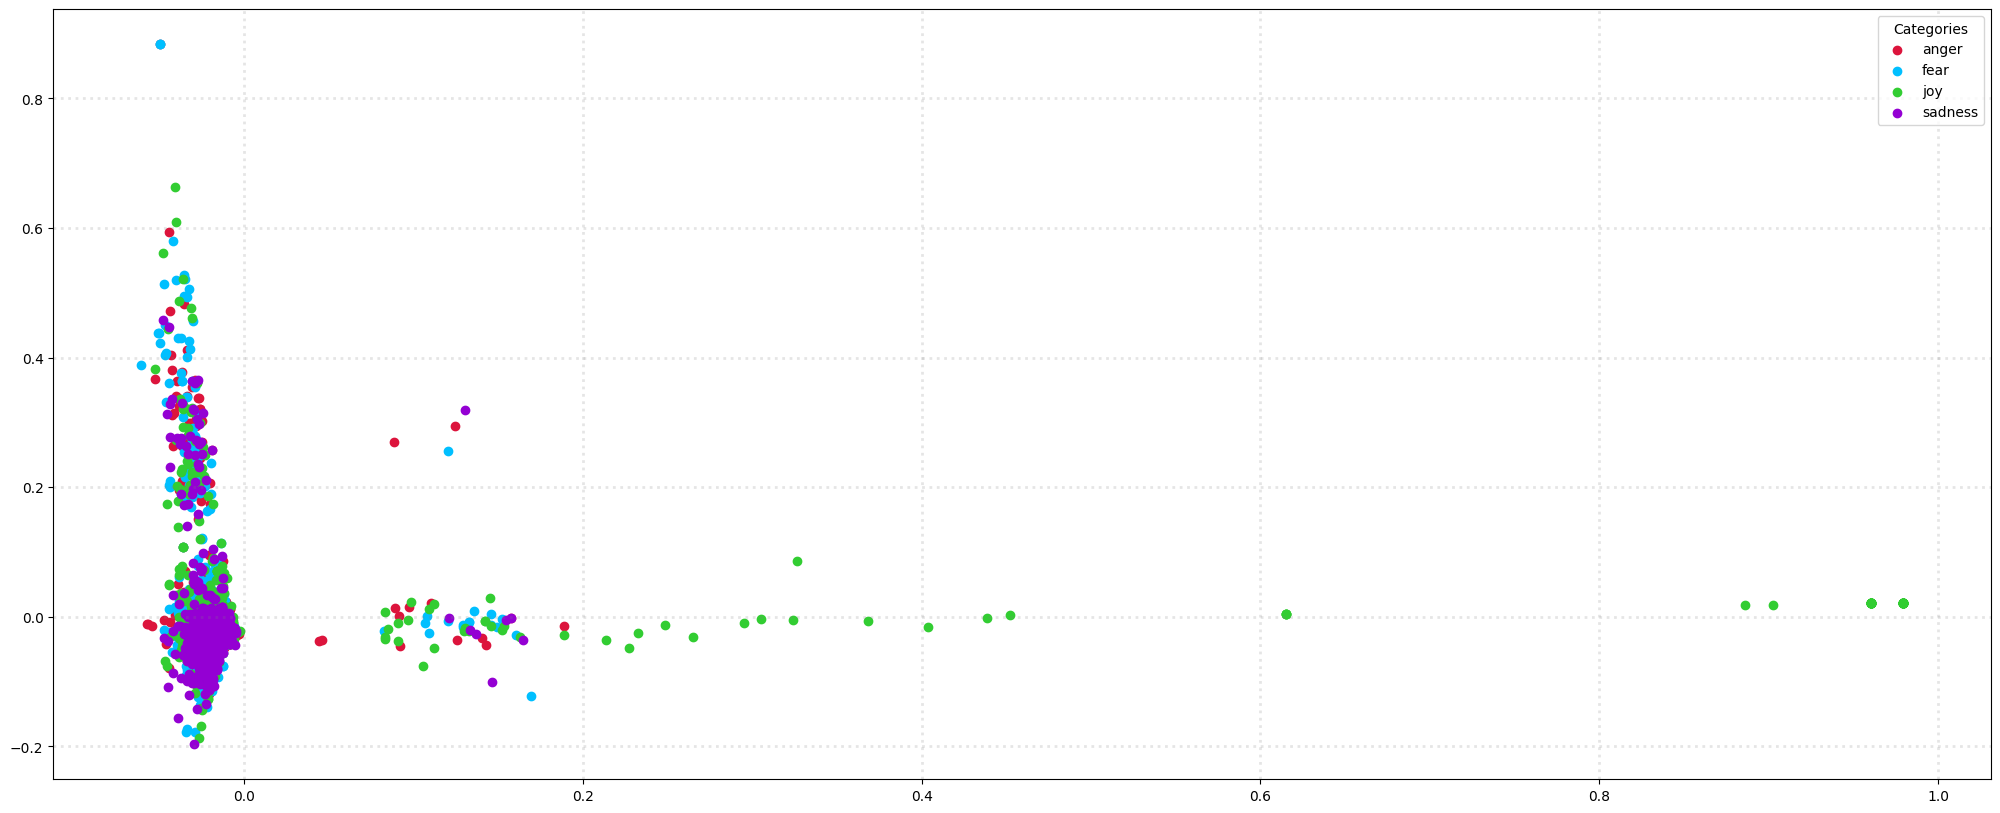

In [105]:
import matplotlib.pyplot as plt

color = ['crimson', 'deepskyblue', 'limegreen', 'darkviolet', 'yellow', 'mediumblue', 'gold', 'greenyellow']

# plot
fig = plt.figure(figsize=(25, 10))
ax = fig.subplots()

# Create an empty list to store legend handles and labels
legend_handles = []

for c, category in zip(color, categories):
    xs = tfidf_PCA[train_df['emotion'] == category].T[0]
    ys = tfidf_PCA[train_df['emotion'] == category].T[1]

    # Scatter plot for each category with specified color
    scatter = ax.scatter(xs, ys, c=c, marker='o', label=category)

    # Append the scatter plot handle and label to the legend_handles list
    legend_handles.append(scatter)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

# Add legend using the legend_handles list
ax.legend(handles=legend_handles, title='Categories', loc='upper right')

# Show the plot
plt.show()


Scatter plot visualizes how the text data points are distributed in this reduced 2D space using PCA, with different colors representing different categories or emotions.

In [106]:
#LDA
from sklearn.decomposition import LatentDirichletAllocation
#tfidf_LDA indicating the probability of each document belonging to each topic.
#LDA can be used to analyze the main topics present in a collection of documents.

#n_components = 30 : 30 topics expect to find in documents
LDA = LatentDirichletAllocation(n_components = 30, random_state = 42)
tfidf_LDA = LDA.fit_transform(train_data_TFIDF_features_500.toarray())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [107]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10  # Number of top words to display for each topic
tfidf_feature_names = TFIDF500_vectorizer.get_feature_names_out()
display_topics(LDA, tfidf_feature_names, no_top_words)
#examine which topics are most include in a document based on the tfidf_LDA matrix

Topic 0:
lost feel fan never home revenge snap scare kind like
Topic 1:
see god get work keep rejoice horrific fun late let
Topic 2:
terrorism terrible wan put believe cant also best call sting
Topic 3:
dreadful better fuming fuck tell twitter sure season hour excited
Topic 4:
anger day hate game morning whole delight outrage wrath breezy
Topic 5:
know man didnt sober new worry help pleasing wow raging
Topic 6:
rage nervous little getting want contact race let police really
Topic 7:
pout sad stop show half friend please support issue boiling
Topic 8:
fear afraid bad thats offended shy lot change damn order
Topic 9:
lively watch amazing broadcast musically bully hell grim depression future
Topic 10:
serious heart long despair everything amp side need honestly song
Topic 11:
today right away place dull rejoicing either whats looking sunk
Topic 12:
glee week alarm pine gone tired lord big hear bit
Topic 13:
shocking good something woman laughter hearty actually success frown anxiety
Topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



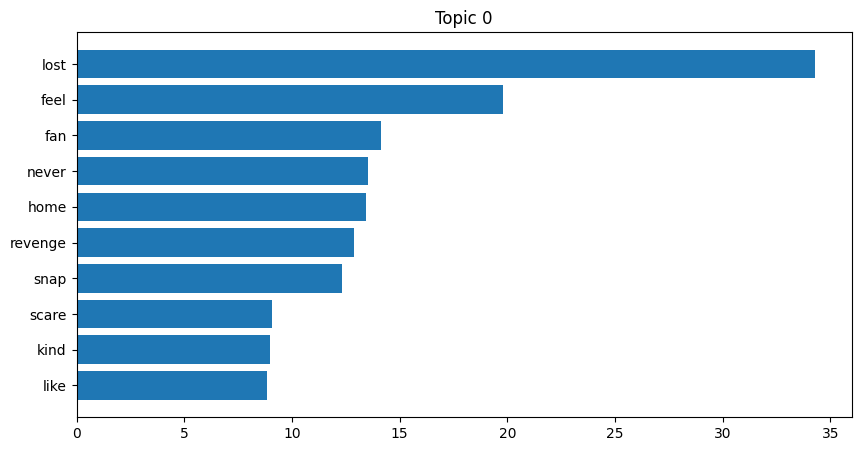

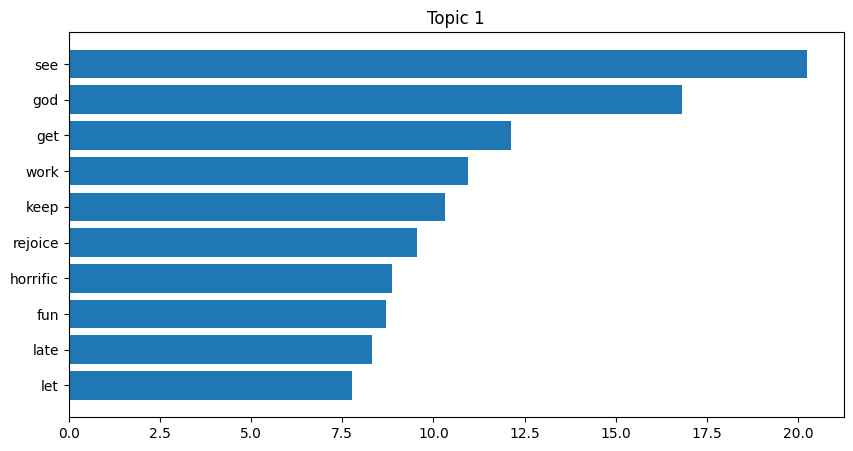

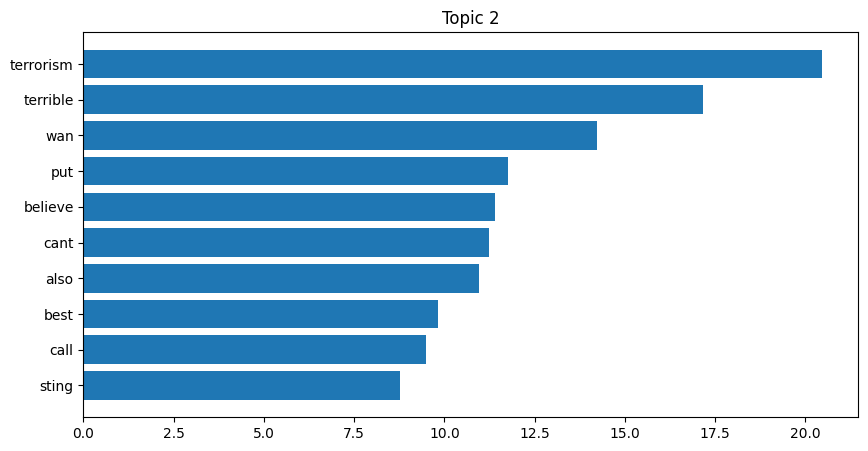

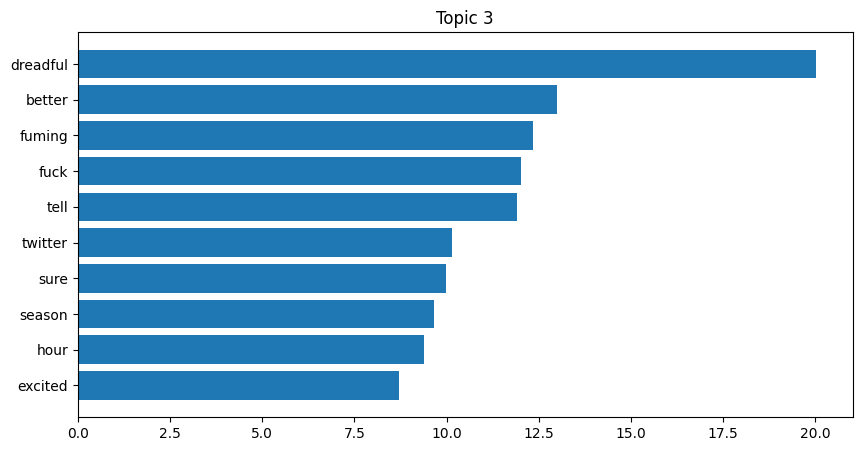

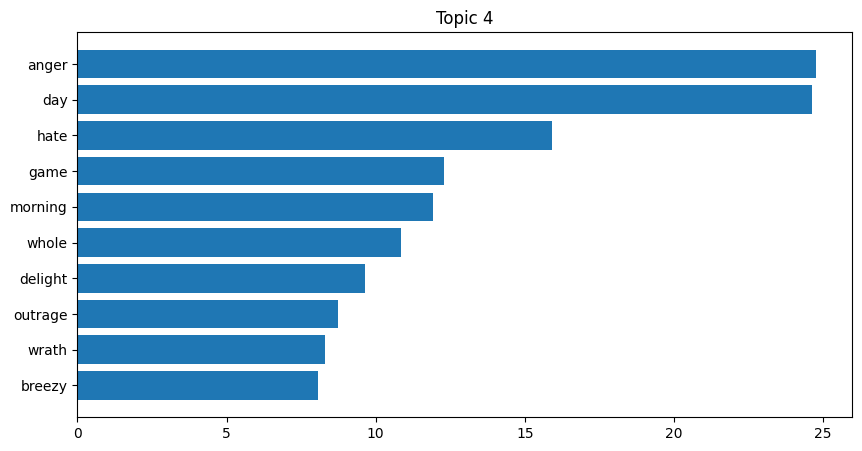

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


def plot_top_words(model, feature_names, no_top_words, no_top_topics):
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx < no_top_topics:
            plt.figure(figsize=(10, 5))
            sorted_indices = topic.argsort()[:-no_top_words - 1:-1]
            plt.barh([feature_names[i] for i in sorted_indices], topic[sorted_indices])
            plt.title(f"Topic {topic_idx}")
            plt.gca().invert_yaxis()
            plt.show()

no_top_words = 10
no_top_topics = 5  # Set this to the number of topics you want to visualize
plot_top_words(LDA, tfidf_feature_names, no_top_words, no_top_topics)

#### visualize the top words in each topic generated by a Latent Dirichlet Allocation (LDA)  ###

In [109]:
#using glove to find words most similar to the word 'happy'

import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [172]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [136]:
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [173]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2319      joy
1781     fear
389     anger
1085     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### 6.3 Build model

In [175]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



![Imgur](/content/drive/MyDrive/DM/DM2023-Lab2-Master/pics/pic2.png)

In [176]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0         
          

### 6.4 Train

In [177]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger(path+'logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



113/113 [==============================] - 3s 12ms/step - loss: 1.3323 - accuracy: 0.3462 - val_loss: 1.2869 - val_accuracy: 0.4496
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 0.9938 - accuracy: 0.6410 - val_loss: 0.9379 - val_accuracy: 0.6542
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.7908 - val_loss: 0.7779 - val_accuracy: 0.7089
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8472 - val_loss: 0.7790 - val_accuracy: 0.6974
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8821 - val_loss: 0.7924 - val_accuracy: 0.7032
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.9037 - val_loss: 0.8340 - val_accuracy: 0.6772
Epoch 7/25
113/113 [==============================] - 1s 4ms/step - loss: 0.2278 - accuracy: 0.9250 - val_loss: 0.8856 - val_accuracy: 0.6859
Epoch 8/25
113/1

### 6.5 Predict on testing data

In [178]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:10]

3/3 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[9.99999821e-01, 2.49029495e-11, 3.55461651e-08, 9.51654897e-08],
       [1.16890613e-02, 5.36900386e-02, 1.85362773e-03, 9.32767272e-01],
       [7.30080006e-04, 1.70529937e-08, 7.82770991e-01, 2.16498852e-01],
       [2.02228082e-03, 8.59963620e-07, 9.97060955e-01, 9.15958954e-04],
       [4.99334157e-01, 2.37414896e-01, 7.68971667e-02, 1.86353803e-01],
       [8.64694733e-03, 8.17384869e-02, 1.09691005e-04, 9.09504890e-01],
       [1.65680656e-04, 9.99416232e-01, 1.40030954e-06, 4.16616269e-04],
       [6.76796306e-03, 9.24627721e-01, 7.76483770e-03, 6.08393028e-02],
       [5.46039641e-01, 6.51459843e-02, 2.69399643e-01, 1.19414717e-01],
       [9.09267055e-06, 9.33286250e-01, 6.66973963e-02, 7.09525693e-06]],
      dtype=float32)

In [179]:
pred_result = label_decode(label_encoder, pred_result)
print(pred_result[:10])

['anger' 'sadness' 'joy' 'joy' 'anger' 'sadness' 'fear' 'fear' 'anger'
 'fear']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [180]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [181]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv(path+"logs/training_log.csv")
training_log

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.346250,1.332276,0.449568,1.286863
1,1,0.641019,0.993758,0.654179,0.937936
2,2,0.790756,0.589984,0.708934,0.777901
3,3,0.847218,0.421681,0.697406,0.779037
4,4,0.882092,0.336359,0.703170,0.792443
5,5,0.903681,0.279669,0.677233,0.834031
6,6,0.924993,0.227752,0.685879,0.885562
7,7,0.939939,0.190350,0.688761,0.984401
8,8,0.946305,0.169341,0.682997,0.990722
9,9,0.957653,0.143137,0.711816,1.022245


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="/content/drive/MyDrive/DM/DM2023-Lab2-Master/pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="/content/drive/MyDrive/DM/DM2023-Lab2-Master/pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



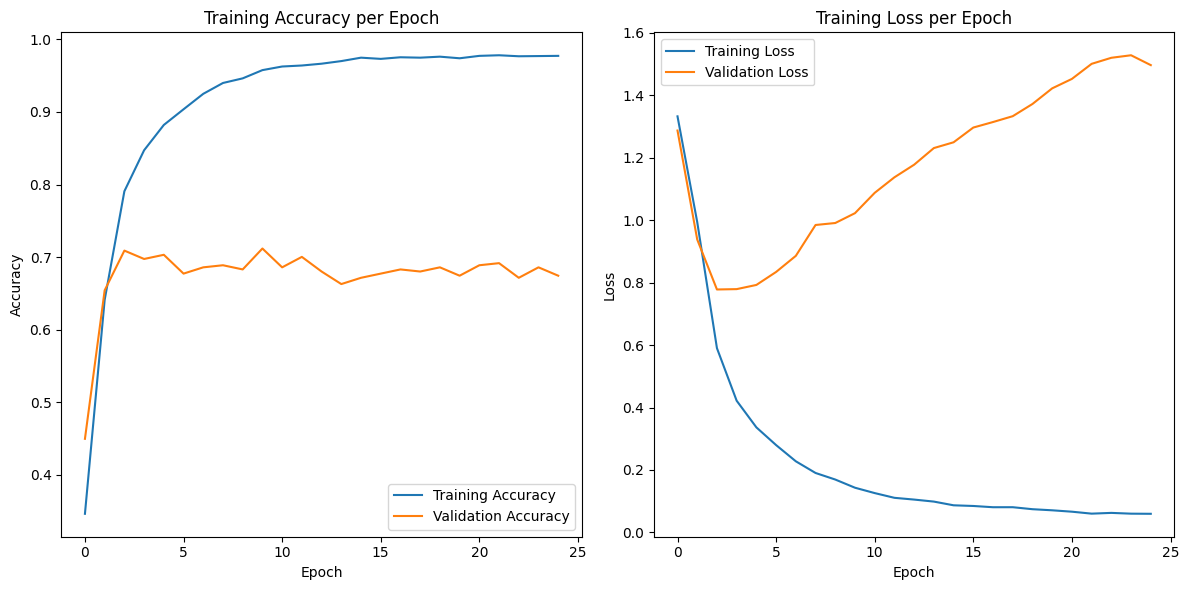

In [182]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract data
epoch = training_log["epoch"]
loss = training_log["loss"]
val_loss = training_log["val_loss"]
accuracy = training_log["accuracy"]
val_accuracy = training_log["val_accuracy"]

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy on first subplot
axes[0].plot(epoch, accuracy, label="Training Accuracy")
axes[0].plot(epoch, val_accuracy, label="Validation Accuracy")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Training Accuracy per Epoch")
axes[0].legend()

# Plot loss on second subplot
axes[1].plot(epoch, loss, label="Training Loss")
axes[1].plot(epoch, val_loss, label="Validation Loss")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].set_title("Training Loss per Epoch")
axes[1].legend()

plt.tight_layout()
plt.show()

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [183]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,id,text,text_tokenized
2319,30315,It's Thursday which means it's Grey's day #TGI...,"[It, 's, Thursday, which, means, it, 's, Grey,..."
1781,20924,#Trends thread;'P)..it was in my #drafts&amp;n...,"[#, Trends, thread, ;, ', P, ), .., it, was, i..."
389,10389,"@BosNaud so scared to ruffle feathers, he reso...","[@, BosNaud, so, scared, to, ruffle, feathers,..."
1085,20228,We ashamed of being an ally to you. Pakistan s...,"[We, ashamed, of, being, an, ally, to, you, .,..."
681,10681,"@RichardHBell Yes, I think he held a grudge ...","[@, RichardHBell, Yes, ,, I, think, he, held, ..."


In [184]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:5]

array([list(['It', "'s", 'Thursday', 'which', 'means', 'it', "'s", 'Grey', "'s", 'day', '#', 'TGIT', '#', 'rejoice']),
       list(['#', 'Trends', 'thread', ';', "'", 'P', ')', '..', 'it', 'was', 'in', 'my', '#', 'drafts', '&', 'amp', ';', 'now', '#', 'posted', '2', 'mins', 'after', 'my', '#', 'birthday', '..', 'so', '#', 'close', ':', "'", 'O', '!', ':', "''", '/', '...', 'but', 'anyway', 'it', '#', 'really', 'was', 'the', '#', 'start', 'of']),
       list(['@', 'BosNaud', 'so', 'scared', 'to', 'ruffle', 'feathers', ',', 'he', 'resorted', 'to', 'writing', 'in', 'cryptic', 'code', '.', '#', 'UncleCamsCabin']),
       list(['We', 'ashamed', 'of', 'being', 'an', 'ally', 'to', 'you', '.', 'Pakistan', 'sacrificed', 'almost', '50000', 'civilians', 'by', 'siding', 'you', 'in', 'war', 'on', '#', 'terror', '@', 'JudgeTedPoe']),
       list(['@', 'RichardHBell', 'Yes', ',', 'I', 'think', 'he', 'held', 'a', 'grudge', '...'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [185]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [186]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.39524785,  0.47637847,  0.2538462 ,  0.09091125, -0.21522583,
       -1.3372525 ,  0.43492353,  1.215214  , -0.29549608, -0.8428372 ,
       -0.5227008 , -0.76117134, -0.7304296 ,  0.6973814 , -0.16654992,
       -0.6638117 , -0.3215654 , -0.4088698 ,  0.24960028, -1.0595514 ,
        0.47262567,  1.1945199 ,  0.6298405 ,  0.29896232,  0.36625883,
        0.10642272, -0.90576535,  0.728027  ,  0.00538627, -0.01423963,
        0.23248765, -0.35317415,  0.9202401 , -0.964284  , -0.2648021 ,
        0.31582505,  0.82005167, -0.10240083, -0.3630785 , -0.6216136 ,
       -0.09790953,  0.05278191, -0.34633106,  0.11396135,  0.75957364,
       -0.04023342, -0.576445  ,  0.06049284,  0.33110127,  0.90028954,
       -0.13036826, -0.5061415 ,  0.05204325, -0.20216545, -0.5803365 ,
       -0.4264061 ,  0.61742437,  0.10280892, -0.51420605, -0.00572223,
       -0.03434521, -0.06892307,  0.36975083,  0.25825346, -0.76356536,
        0.45275193,  0.48293513,  0.62280697, -0.9047788 ,  0.11

In [187]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9316572546958923),
 ('birthday', 0.9274667501449585),
 ('memories😊', 0.9179295301437378),
 ('free', 0.91083163022995),
 ('help', 0.9020939469337463),
 ('smile', 0.900705099105835),
 ('dad', 0.8985934853553772),
 ('bday', 0.8984584212303162),
 ('Kik', 0.8973701000213623),
 ('establishment', 0.89536452293396)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [188]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/content/drive/MyDrive/DM/DM2023-Lab2-Master/GoogleNews/GoogleNews-vectors-negative300bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [189]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [190]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here


'''First way: Tokenize sentence into words. For each word in the sentence, retrieve its pre-trained word vector.
Average all the word vectors to obtain a single vector representation for the entire sentence.

Second way: Assign weights to each word based on importance (e.g., TF-IDF scores).
Calculate a weighted average of word vectors, giving more influence to important words.

Third way: We can use word embeddings as the first layer of your network. Keras, for example, provides an Embedding layer that can be initialized with pre-trained word vectors.
Define an Embedding layer with input dimensions equal to the vocabulary size and output dimensions equal to the dimension of pre-trained word vectors. We can set the weights of this layer to pre-trained word vectors.
Tokenize sentences and convert them to sequences of word indices.
Use the Embedding layer to map the word indices to word vectors.
Aggregate the word vectors (e.g., average or use an LSTM layer) to obtain a fixed-size vector representation for the sentence. Then continue with the rest of the neural network architecture.'''


### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [191]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [192]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [193]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [194]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [195]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

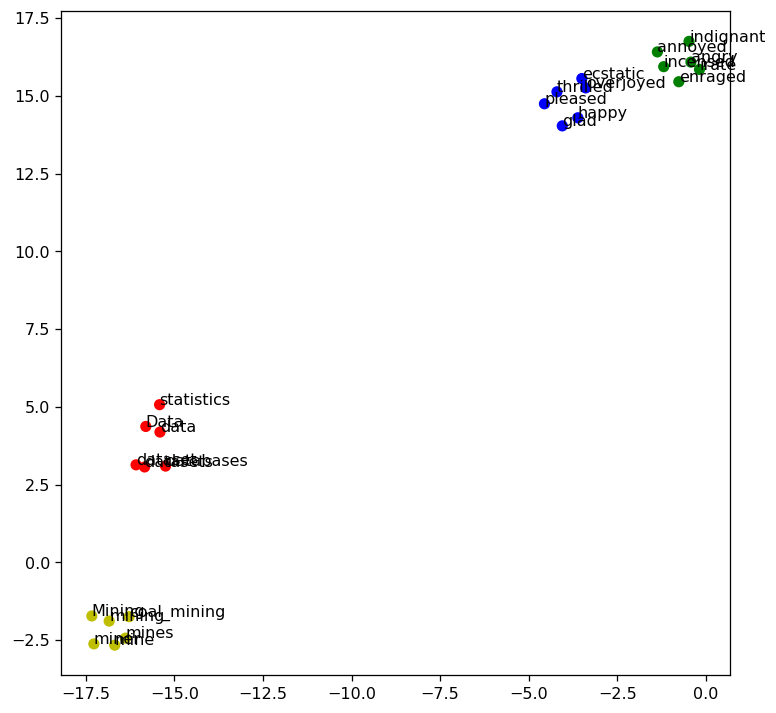

In [198]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [199]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

new_target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(new_target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

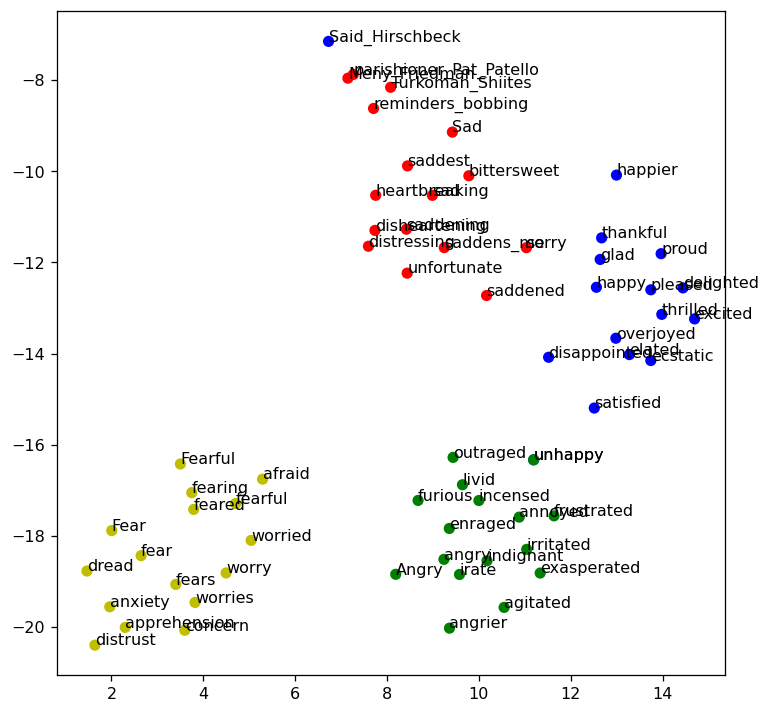

In [203]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(new_target_words)
all_word = list(model.index_to_key)
word_train = new_target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(new_target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---